![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [2]:
#Ejercicio 1
df1 = pd.read_csv("data/datasets_beers.csv") 

In [3]:
df1.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
df1.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [5]:
df1.shape

(2410, 8)

In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [7]:
df1.drop('Unnamed: 0',axis = 1, inplace=True)
df1

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [8]:
df1.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [10]:
df1.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [11]:
df1.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [12]:
df1.groupby('style')[['name']].nunique()

,name
style,
Abbey Single Ale,2
Altbier,12
American Adjunct Lager,14
American Amber / Red Ale,131
American Amber / Red Lager,26
...,...
Tripel,11
Vienna Lager,17
Wheat Ale,1


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [13]:
df1.iloc[9:21]

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [14]:
df1.iloc[9:21,3:7]

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [15]:
#Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
resumen = df1.iloc[9:21][['abv','ibu','ounces']]
resumen

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [16]:
#Convierte el resultado del apartado 3 en un array de `numpy`
np.array(resumen)

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [17]:
df1['ounces'].sum()

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [18]:
df1[['ibu']].aggregate(['mean','min','max'])

,ibu
mean,42.713167
min,4.000000
max,138.000000


In [19]:
df1['name'][df1['ibu'].idxmax()]

'Bitter Bitch Imperial IPA'

In [20]:
df1['name'][df1['ibu'].idxmin()]

'Summer Solstice'

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [21]:
df1['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
numeric_columns = df1.select_dtypes(include=['number']).columns
numeric_columns

Index(['abv', 'ibu', 'id', 'brewery_id', 'ounces'], dtype='object')

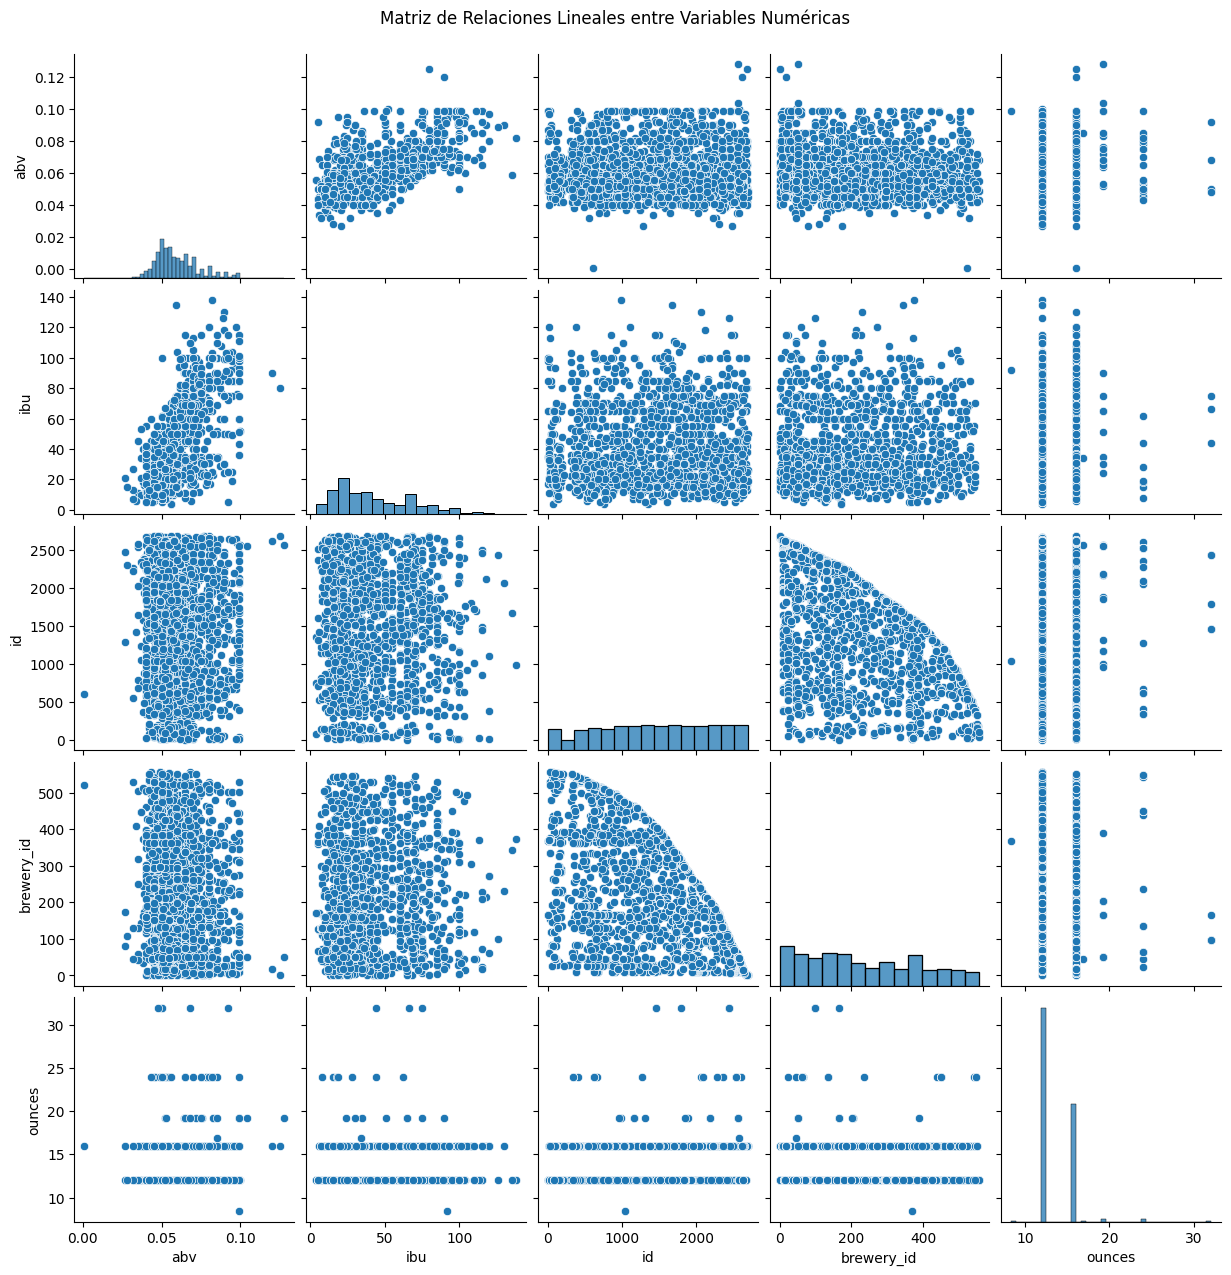

In [24]:
# Crear matriz de scatter plots
sns.pairplot(df1[numeric_columns])
plt.suptitle('Matriz de Relaciones Lineales entre Variables Numéricas', y=1.02)
plt.show()

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

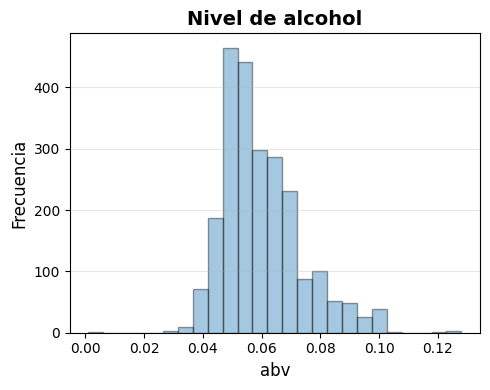

In [29]:
plt.figure(figsize=(5, 4)) # esto determina el tamaño del gráfico, está en pulgadas

# Crea un histograma
plt.hist(df1['abv'].dropna(), bins=25, edgecolor='black', alpha=0.4) # crea el histograma, se le aplica un el dropna para quitar los null 
#antes de graficar, edgecolor es el color de la barra y alpha es la transparencia de las barras (poner valores entre 0 y 1)
#los bins es la cantidad de barras que se vana a poner en el gráfico


#formato del gráfico
plt.title('Nivel de alcohol', fontsize=14, fontweight='bold') # para establecer un titulo y su formato
plt.xlabel('abv', fontsize=12) # Se le asigna el nombre al eje x 
plt.ylabel('Frecuencia', fontsize=12) # Se le asigna el nombre al eje y 
plt.grid(axis='y', alpha=0.3)

# para mostrar el gráfico
plt.tight_layout()#hace que los elementos no se solapen
plt.show() #renderiza la imagen del gráfico

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

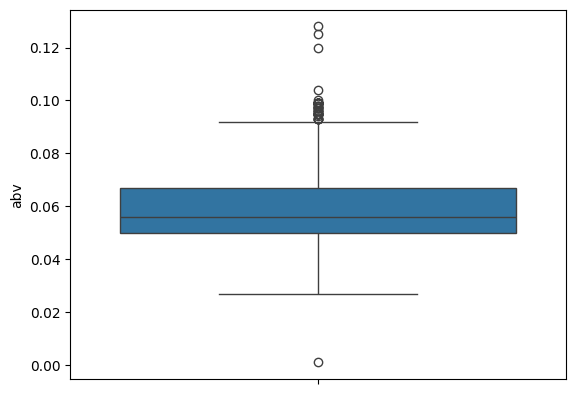

In [ ]:
sns.boxplot(y='abv', data=df1)# si le pongo x en vez de y, cambia el sentido del grafico
plt.show()

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [32]:
df1.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces'], dtype='object')

In [34]:
df1.groupby('style')['abv'].mean().sort_values(ascending=False)

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 99, dtype: float64

In [35]:
df1.groupby('style')['ibu'].mean().sort_values(ascending=False)

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [37]:
df2 = pd.read_csv("data/datasets_breweries.csv") 
df2

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [39]:
df2.describe()

,Unnamed: 0
count,558.000000
mean,278.500000
std,161.224998
min,0.000000
25%,139.250000
50%,278.500000
75%,417.750000
max,557.000000


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [41]:
df2.rename(columns={'Unnamed: 0':'brewery_id', 'name':'brewery_name'},inplace=True)
df2

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [43]:
df1.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [53]:
df2.head(5)

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [51]:
df1['brewery_id'].max()

np.int64(557)

In [50]:
df1['id'].max()

np.int64(2692)

In [52]:
df2['brewery_id'].max()

np.int64(557)

In [57]:
join_data = pd.merge(df1,df2)
join_data

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [59]:
join_data['state'].nunique()

51

In [60]:
join_data['city'].nunique()

384

In [61]:
join_data['brewery_id'].nunique()

558

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [ ]:
counted = ps.pivot_table(titanic,values=['survived'],index=['pclass', 'gender'],aggfunc='sum')
counted

In [64]:
pd.pivot_table(join_data, values=['abv'], index=['state','city'],aggfunc=['mean','median','max'])

mean  median    max
                       abv     abv    abv
state city                               
AK    Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
AL    Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
WI    Wilson      0.055000  0.0550  0.055
WV    Lewisburg   0.062000  0.0620  0.067
WY    Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[393 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [85]:
#strip() elimina espacios en blanco y caracteres especiales del inicio y final de un string.
indiana = join_data[join_data['state'].str.strip() == 'IN']
indiana.sort_values('ibu', ascending=False)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,24,12.0,Burn 'Em Brewing,Michigan City,IN
2191,0.085,115.0,1449,Overlord Imperial IPA,American Double / Imperial IPA,17,16.0,Tin Man Brewing Company,Evansville,IN
811,0.060,104.0,1610,Half Cycle IPA,American IPA,16,16.0,Flat 12 Bierwerks,Indianapolis,IN
2062,0.091,91.0,651,Isis,American Double / Imperial IPA,25,16.0,Sun King Brewing Company,Indianapolis,IN
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0,Tin Man Brewing Company,Evansville,IN
...,...,...,...,...,...,...,...,...,...,...
2056,0.070,NaN,934,The Deuce,American Brown Ale,25,16.0,Sun King Brewing Company,Indianapolis,IN
2061,0.080,NaN,660,Chaka,Belgian Strong Pale Ale,25,16.0,Sun King Brewing Company,Indianapolis,IN
2190,0.055,NaN,1817,Klingon Warnog Roggen Dunkel,Roggenbier,17,16.0,Tin Man Brewing Company,Evansville,IN
2277,0.060,NaN,1950,Dragonfly IPA,American IPA,202,16.0,Upland Brewing Company,Bloomington,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [94]:
describe_ibu = pd.pivot_table(index=['city'], values= ['ibu'], data=join_data,aggfunc='describe')
describe_ibu

ibu                                                 \
                   25%    50%     75% count    max        mean    min   
city                                                                    
Abingdon        135.00  135.0  135.00   1.0  135.0  135.000000  135.0   
Abita Springs    15.00   17.0   34.50   3.0   52.0   27.333333   13.0   
Ada                NaN    NaN     NaN   0.0    NaN         NaN    NaN   
Afton            28.00   45.0   60.00   4.0   60.0   43.000000   22.0   
Airway Heights     NaN    NaN     NaN   0.0    NaN         NaN    NaN   
...                ...    ...     ...   ...    ...         ...    ...   
Woodinville      39.75   44.0   51.00   4.0   72.0   46.750000   27.0   
Worcester        69.00   69.0   69.00   1.0   69.0   69.000000   69.0   
Yakima           46.00   54.0   62.00   2.0   70.0   54.000000   38.0   
Yardley            NaN    NaN     NaN   0.0    NaN         NaN    NaN   
York             35.00   41.0   50.25   4.0   75.0   44.250000   20.0   

                           
                      std  
city                       
Abingdon              NaN  
Abita Springs   21.455380  
Ada                   NaN  
Afton           19.899749  
Airway Heights        NaN  
...                   ...  
Woodinville     18.643587  
Worcester             NaN  
Yakima          22.627417  
Yardley               NaN  
York            22.779742  

[384 rows x 8 columns]

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [ ]:
abv_min = join_data[join_data.groupby('brewery_name')['abv'].transform(lambda x: (x >= 0.07).any())]
abv_min
#transform () - aplica una función a cada grupo y devuelve un resultado que tiene el mismo tamaño que el grupo original. Entre parentesis
#se pone lo que quiere que se haga, puede ser una operacion de las ya establecidas  ('sum','mean',etc) o una que nosotros determinemos
#any() - si dentro del grupo que estamos analizando alguna operacion da true lo devuelve

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [129]:
media_total =join_data['ibu'].mean()

In [134]:
join_data[join_data.groupby('state')['ibu'].transform('mean') > media_total]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
